In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [6]:
df = pd.read_csv('cancer dataset.csv', sep=';')

#### Data Exploration

In [7]:
df.head()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
0,4,1,1,1,2,3,1,1,1,begnin
1,1,5,8,6,5,8,7,10,1,malignant
2,3,2,2,3,2,1,1,1,1,begnin
3,3,1,1,3,8,1,5,8,1,begnin
4,10,4,6,1,2,10,5,3,1,malignant


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clump       300 non-null    int64 
 1   ucellsize   300 non-null    int64 
 2   ucellshape  300 non-null    int64 
 3   mgadhesion  300 non-null    int64 
 4   sepics      300 non-null    int64 
 5   bnuclei     300 non-null    int64 
 6   bchromatin  300 non-null    int64 
 7   normnucl    300 non-null    int64 
 8   mitoses     300 non-null    int64 
 9   classe      300 non-null    object
dtypes: int64(9), object(1)
memory usage: 23.6+ KB


In [13]:
### Seperate the features and labels

features = ['clump', 'ucellsize', 'ucellshape', 'mgadhesion', 'sepics', 'bnuclei',
             'bchromatin', 'normnucl', 'mitoses']
label = 'classe'

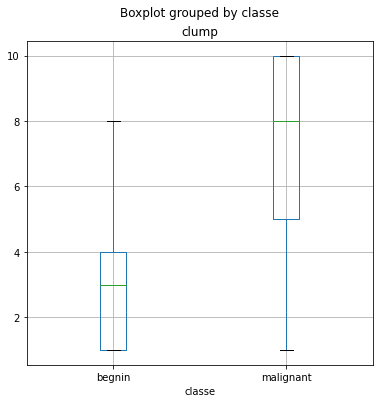

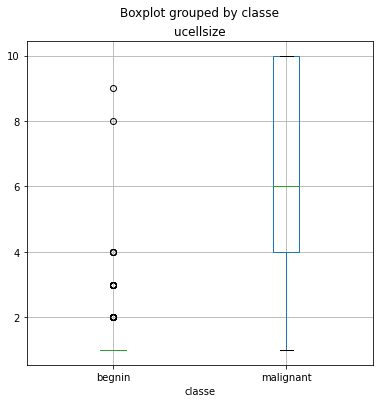

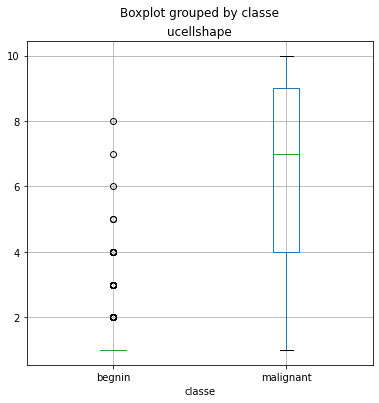

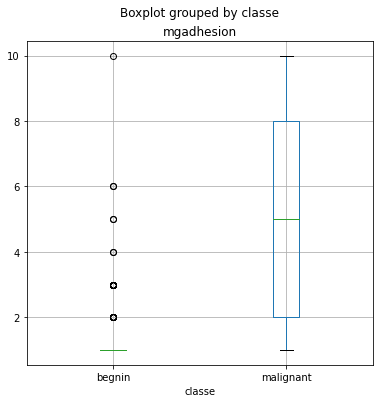

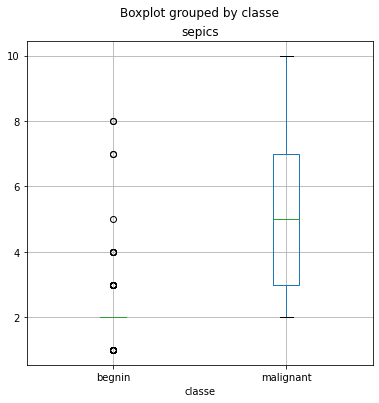

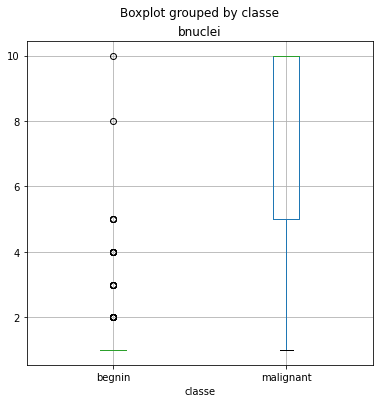

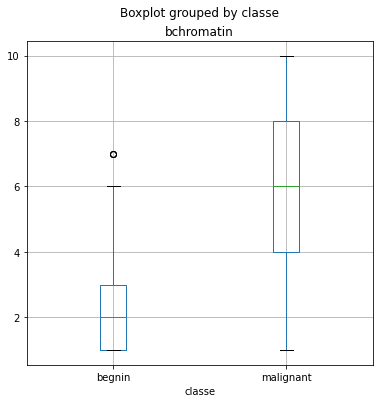

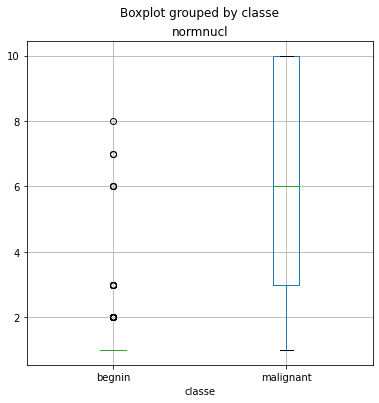

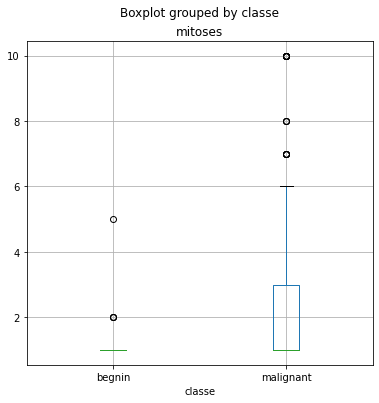

In [14]:
for col in features:
    df.boxplot(column=col, by='classe', figsize=(6,6))
    plt.title(col)
plt.show()

 clump and bchromatin showed noticeable difference between the two classes

In [22]:
df['classe'].value_counts()

begnin       199
malignant    101
Name: classe, dtype: int64

There's a slight imbalance in the data

### Data Cleaning

In [21]:
df.isnull().sum()

clump         0
ucellsize     0
ucellshape    0
mgadhesion    0
sepics        0
bnuclei       0
bchromatin    0
normnucl      0
mitoses       0
classe        0
dtype: int64

In [23]:
df.duplicated().sum()

88

There's a lot of duplicates but it is possible for a data like this to have duplicates so we proceed with it

In [24]:
# Let's select the best 3 features to start with

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=3)

X_selected = fs.fit_transform(df[features].values, df[label].values)

 When using SelectKBest for classification, our score function would be f_classif

In [25]:
X_selected.shape

(300, 3)

In [46]:
y = df[label].values

In [47]:
y.shape

(300,)

In [45]:
# encode the label
df[label] = df[label].map({'begnin': 1, 'malignant': 0}).astype(int)

##### Split the dataset and train the model

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.30, random_state=0)

Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


In [50]:
predictions = model.predict(X_test)

In [51]:
print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.9666666666666667


#### Let's check how well our model is performing

In [52]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        34
           1       0.95      1.00      0.97        56

    accuracy                           0.97        90
   macro avg       0.97      0.96      0.96        90
weighted avg       0.97      0.97      0.97        90



from the report, we can see that we have a perfect recall for the benign class and a perfect precision for the malignant class

In [53]:
# from sklearn.metrics import precision_score, recall_score

# print("Overall Precision:",precision_score(y_test, predictions))
# print("Overall Recall:",recall_score(y_test, predictions))

In [54]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[31  3]
 [ 0 56]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

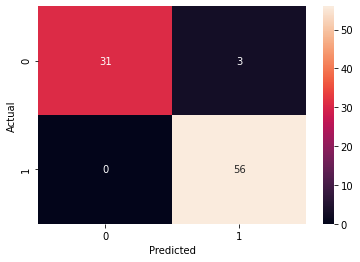

In [55]:
import seaborn as sns

confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [56]:
y_scores = model.predict_proba(X_test)

y_scores

array([[1.34388422e-02, 9.86561158e-01],
       [1.34388422e-02, 9.86561158e-01],
       [5.66249530e-01, 4.33750470e-01],
       [9.99119423e-01, 8.80576827e-04],
       [9.55624613e-01, 4.43753871e-02],
       [2.42448135e-02, 9.75755186e-01],
       [1.34388422e-02, 9.86561158e-01],
       [9.95700006e-01, 4.29999423e-03],
       [2.90249749e-02, 9.70975025e-01],
       [1.96123593e-02, 9.80387641e-01],
       [2.90249749e-02, 9.70975025e-01],
       [1.34388422e-02, 9.86561158e-01],
       [9.41437440e-01, 5.85625600e-02],
       [1.99488724e-02, 9.80051128e-01],
       [1.34388422e-02, 9.86561158e-01],
       [9.99721807e-01, 2.78193193e-04],
       [1.34388422e-02, 9.86561158e-01],
       [1.34388422e-02, 9.86561158e-01],
       [2.43241031e-01, 7.56758969e-01],
       [9.41437440e-01, 5.85625600e-02],
       [1.34388422e-02, 9.86561158e-01],
       [2.90249749e-02, 9.70975025e-01],
       [9.99721807e-01, 2.78193193e-04],
       [1.34388422e-02, 9.86561158e-01],
       [1.343884

The confusion matrix shows that our model predicted 3 examples to be begnin and was wrong. The prediction was correct for every other instance. Would this be because we have more of the begnin class in the data

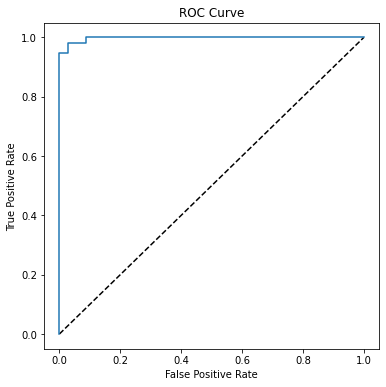

In [58]:
## Let's use an ROC curve to further visualize how well our model is performing

from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)[:,1]
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [60]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores)
print('AUC: ' + str(auc))

AUC: 0.9973739495798318


### Random forest classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=10)

RF_model.fit(X_train, y_train)

print(RF_model)

RandomForestClassifier(n_estimators=10)


Confusion Matrix:
 [[31  3]
 [ 1 55]] 

Accuracy: 0.9555555555555556
Overall Precision: 0.9482758620689655
Overall Recall: 0.9821428571428571

AUC: 0.9934348739495799


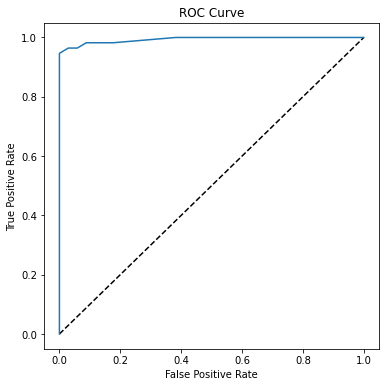

In [63]:
predictions = RF_model.predict(X_test)
y_scores = RF_model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [64]:
import joblib

# Save the model as a pickle file
filename = 'cancer_model.pkl'
joblib.dump(model, filename)

['cancer_model.pkl']

## KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)

neigh.fit(X_train, y_train)

KNeighborsClassifier()

Confusion Matrix:
 [[33  1]
 [ 1 55]] 

Accuracy: 0.9777777777777777
Overall Precision: 0.9821428571428571
Overall Recall: 0.9821428571428571

AUC: 0.9989495798319328


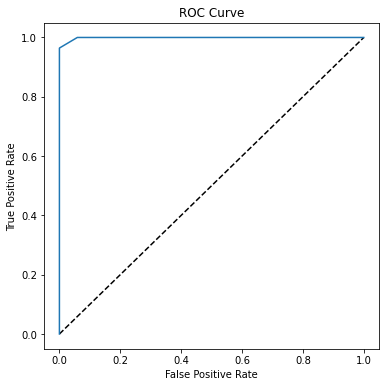

In [66]:
predictions = neigh.predict(X_test)
y_scores = neigh.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Decision Tree

In [67]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(123.08823529411765, 205.35999999999999, 'X[0] <= 2.5\ngini = 0.435\nsamples = 210\nvalue = [67, 143]'),
 Text(59.082352941176474, 181.2, 'X[2] <= 6.0\ngini = 0.071\nsamples = 135\nvalue = [5, 130]'),
 Text(39.38823529411765, 157.04, 'X[2] <= 4.5\ngini = 0.015\nsamples = 131\nvalue = [1, 130]'),
 Text(19.694117647058825, 132.88, 'gini = 0.0\nsamples = 127\nvalue = [0, 127]'),
 Text(59.082352941176474, 132.88, 'X[1] <= 2.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(39.38823529411765, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(78.7764705882353, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(78.7764705882353, 157.04, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(187.09411764705882, 181.2, 'X[2] <= 2.5\ngini = 0.287\nsamples = 75\nvalue = [62, 13]'),
 Text(118.16470588235295, 157.04, 'X[0] <= 3.5\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(98.47058823529412, 132.88, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(137.85882352941178, 13

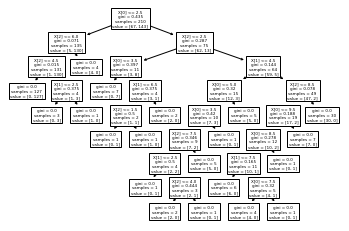

In [68]:
tree.plot_tree(clf)

Confusion Matrix:
 [[27  7]
 [ 1 55]] 

Accuracy: 0.9111111111111111
Overall Precision: 0.8870967741935484
Overall Recall: 0.9821428571428571

AUC: 0.8881302521008404


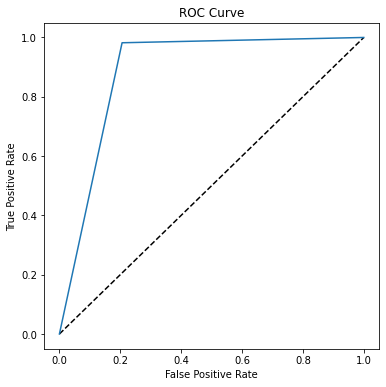

In [69]:
predictions = clf.predict(X_test)
y_scores = clf.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

Confusion Matrix:
 [[33  1]
 [ 2 54]] 

Accuracy: 0.9666666666666667
Overall Precision: 0.9818181818181818
Overall Recall: 0.9642857142857143

AUC: 0.9989495798319328


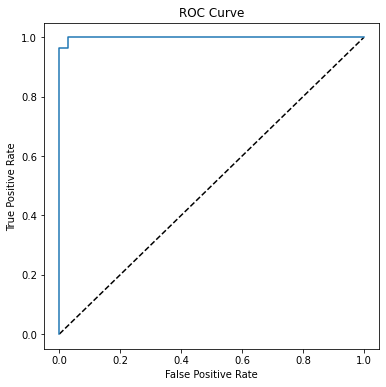

In [71]:
predictions = gnb.predict(X_test)
y_scores = gnb.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## SVC

In [82]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# clf_ = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True))

clf_ = SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True)
clf_.fit(X_train, y_train)

SVC(C=1000000000.0, gamma=1e-07, probability=True)

In [83]:
predictions = clf.predict(X_test)
y_scores = clf.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

AttributeError: predict_proba is not available when  probability=False